In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf

In [31]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [32]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
train=train.flow_from_directory('/content/drive/My Drive/Colab Notebooks/beans/train',
                                target_size=(200,200), 
                                batch_size=3, 
                                class_mode='categorical')

Found 1034 images belonging to 3 classes.


In [34]:
test=test.flow_from_directory('/content/drive/My Drive/Colab Notebooks/beans/test', 
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

Found 128 images belonging to 3 classes.


In [35]:
validation=validation.flow_from_directory('/content/drive/My Drive/Colab Notebooks/beans/validation', 
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

Found 133 images belonging to 3 classes.


In [36]:
train.class_indices

{'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2}

In [38]:
classification=['spot','rust','healthy']

In [37]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [39]:
import tensorflow_hub as hub

In [40]:
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape=(224,224,3))

In [41]:
feature_extractor_layer.trainable = False

In [42]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3,activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [43]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=['acc'])

In [44]:
history = model.fit(train, epochs=6, validation_data=validation)

Epoch 1/6
345/345 [==============================] - 72s 209ms/step - loss: 0.6710 - acc: 0.6983 - val_loss: 0.6283 - val_acc: 0.8195
Epoch 2/6
345/345 [==============================] - 44s 127ms/step - loss: 0.6257 - acc: 0.8424 - val_loss: 0.6186 - val_acc: 0.8571
Epoch 3/6
345/345 [==============================] - 44s 127ms/step - loss: 0.6155 - acc: 0.8694 - val_loss: 0.6190 - val_acc: 0.8421
Epoch 4/6
345/345 [==============================] - 43s 126ms/step - loss: 0.6074 - acc: 0.8956 - val_loss: 0.6094 - val_acc: 0.8872
Epoch 5/6
345/345 [==============================] - 44s 126ms/step - loss: 0.6022 - acc: 0.9072 - val_loss: 0.6065 - val_acc: 0.8872
Epoch 6/6
345/345 [==============================] - 43s 125ms/step - loss: 0.6000 - acc: 0.9188 - val_loss: 0.6054 - val_acc: 0.8872


In [45]:
result=model.evaluate(test)

43/43 [==============================] - 5s 107ms/step - loss: 0.6083 - acc: 0.8906


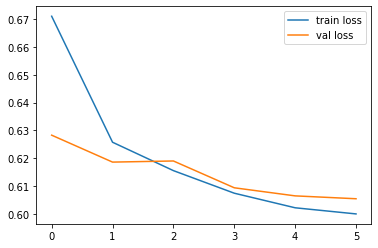

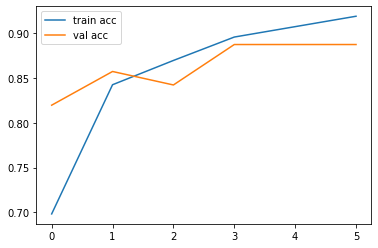

<Figure size 432x288 with 0 Axes>

In [73]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [55]:
#model.save('model_saved.h5') 

In [56]:
#from keras.models import load_model
#from keras.preprocessing import image
#import numpy as np
#model= load_model('model_saved.h5')

In [66]:
from google.colab import files
uploaded=files.upload()

Saving bean_rust_test.11.jpg to bean_rust_test.11.jpg


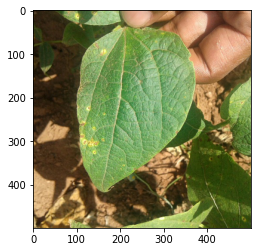

In [67]:
new_image=plt.imread('bean_rust_test.11.jpg')
img=plt.imshow(new_image)

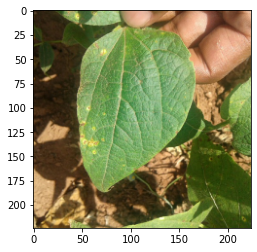

In [68]:
from skimage.transform import resize
resized_image=resize(new_image, (224,224))
img=plt.imshow(resized_image)

In [69]:
predictions=model.predict(np.array([resized_image]))
predictions

array([[1.84344424e-06, 8.88581395e-01, 1.11416884e-01]], dtype=float32)

In [70]:
list_index=[0,1,2]
x=predictions

for i in range(3):
  for j in range(3):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp

In [71]:
print(list_index)

[1, 2, 0]


In [28]:
#img=plt.imshow(resized_image)

In [72]:

for i in range(3):
  print(classification[list_index[i]], ':' , predictions[0][list_index[i]] * 100 )

rust : 88.8581395149231
healthy : 11.141688376665115
spot : 0.000184344423814764
